In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import networkx as nx



In [2]:
file_path = "/kaggle/input/statsbomb-football-data/data/events/15998.json"
df = pd .read_json(file_path)

In [3]:
df.head()

,id,index,period,timestamp,minute,second,type,possession,possession_team,play_pattern,...,shot,goalkeeper,out,foul_won,interception,ball_recovery,block,foul_committed,substitution,miscontrol
0,30fc6c07-f0ea-48f6-b8c4-3b385b529073,1,1,2024-09-07 00:00:00.000,0,0,"{'id': 35, 'name': 'Starting XI'}",1,"{'id': 205, 'name': 'Leganés'}","{'id': 1, 'name': 'Regular Play'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12be4231-3122-485c-81f6-f119c0973c7a,2,1,2024-09-07 00:00:00.000,0,0,"{'id': 35, 'name': 'Starting XI'}",1,"{'id': 205, 'name': 'Leganés'}","{'id': 1, 'name': 'Regular Play'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a5e725bf-81ea-416c-9850-aa174c767e0c,3,1,2024-09-07 00:00:00.000,0,0,"{'id': 18, 'name': 'Half Start'}",1,"{'id': 205, 'name': 'Leganés'}","{'id': 1, 'name': 'Regular Play'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ec3f3698-8aa3-4082-b239-b6e8278525b5,4,1,2024-09-07 00:00:00.000,0,0,"{'id': 18, 'name': 'Half Start'}",1,"{'id': 205, 'name': 'Leganés'}","{'id': 1, 'name': 'Regular Play'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,286e4881-e6f3-4e0d-b870-186402bc22cb,5,1,2024-09-07 00:00:02.017,0,2,"{'id': 30, 'name': 'Pass'}",2,"{'id': 205, 'name': 'Leganés'}","{'id': 9, 'name': 'From Kick Off'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['id', 'index', 'period', 'timestamp', 'minute', 'second', 'type',
       'possession', 'possession_team', 'play_pattern', 'team', 'duration',
       'tactics', 'related_events', 'player', 'position', 'location', 'pass',
       'carry', 'under_pressure', 'ball_receipt', 'counterpress', 'dribble',
       'off_camera', 'duel', 'clearance', 'shot', 'goalkeeper', 'out',
       'foul_won', 'interception', 'ball_recovery', 'block', 'foul_committed',
       'substitution', 'miscontrol'],
      dtype='object')

In [5]:
print(df['team'].head())


0      {'id': 205, 'name': 'Leganés'}
1    {'id': 217, 'name': 'Barcelona'}
2      {'id': 205, 'name': 'Leganés'}
3    {'id': 217, 'name': 'Barcelona'}
4      {'id': 205, 'name': 'Leganés'}
Name: team, dtype: object


In [6]:
barcelona_data = df[df['team'] == 'Barcelona']

# Display the first few rows of Barcelona's data
print(barcelona_data.head())

Empty DataFrame
Columns: [id, index, period, timestamp, minute, second, type, possession, possession_team, play_pattern, team, duration, tactics, related_events, player, position, location, pass, carry, under_pressure, ball_receipt, counterpress, dribble, off_camera, duel, clearance, shot, goalkeeper, out, foul_won, interception, ball_recovery, block, foul_committed, substitution, miscontrol]
Index: []

[0 rows x 36 columns]


In [7]:
# Check the number of non-null values in the 'team' column
print(df['team'].notnull().sum())

# Display some of the 'team' column data to ensure it's there
print(df['team'].head())


3947
0      {'id': 205, 'name': 'Leganés'}
1    {'id': 217, 'name': 'Barcelona'}
2      {'id': 205, 'name': 'Leganés'}
3    {'id': 217, 'name': 'Barcelona'}
4      {'id': 205, 'name': 'Leganés'}
Name: team, dtype: object


In [8]:
# Display the first few rows of the DataFrame to inspect the structure
print(df.head())


                                     id  index  period  \
0  30fc6c07-f0ea-48f6-b8c4-3b385b529073      1       1   
1  12be4231-3122-485c-81f6-f119c0973c7a      2       1   
2  a5e725bf-81ea-416c-9850-aa174c767e0c      3       1   
3  ec3f3698-8aa3-4082-b239-b6e8278525b5      4       1   
4  286e4881-e6f3-4e0d-b870-186402bc22cb      5       1   

                timestamp  minute  second                               type  \
0 2024-09-07 00:00:00.000       0       0  {'id': 35, 'name': 'Starting XI'}   
1 2024-09-07 00:00:00.000       0       0  {'id': 35, 'name': 'Starting XI'}   
2 2024-09-07 00:00:00.000       0       0   {'id': 18, 'name': 'Half Start'}   
3 2024-09-07 00:00:00.000       0       0   {'id': 18, 'name': 'Half Start'}   
4 2024-09-07 00:00:02.017       0       2         {'id': 30, 'name': 'Pass'}   

   possession                 possession_team  \
0           1  {'id': 205, 'name': 'Leganés'}   
1           1  {'id': 205, 'name': 'Leganés'}   
2           1  {'id': 2

In [9]:
# Check the unique team names in your dataset
print(df['team'].apply(lambda x: x['name'] if pd.notnull(x) else None).unique())


['Leganés' 'Barcelona']


In [10]:
# Extract the team name from the 'team' column
df['team_name'] = df['team'].apply(lambda x: x['name'] if pd.notnull(x) else None)

# Filter the data for the specific team (e.g., 'Barcelona')
barcelona_data = df[df['team_name'] == 'Barcelona']

# Display the first few rows of the filtered DataFrame
print(barcelona_data.head())


                                      id  index  period  \
1   12be4231-3122-485c-81f6-f119c0973c7a      2       1   
3   ec3f3698-8aa3-4082-b239-b6e8278525b5      4       1   
13  6e3209d9-58ff-4a8e-a51d-1c9efe0eb611     14       1   
16  e46e2464-9076-43a4-9d53-46e9bb33a4fc     17       1   
18  2d6ed89f-819c-4e02-a6cc-27de67d45223     19       1   

                 timestamp  minute  second  \
1  2024-09-07 00:00:00.000       0       0   
3  2024-09-07 00:00:00.000       0       0   
13 2024-09-07 00:00:10.434       0      10   
16 2024-09-07 00:00:15.545       0      15   
18 2024-09-07 00:00:18.484       0      18   

                                   type  possession  \
1     {'id': 35, 'name': 'Starting XI'}           1   
3      {'id': 18, 'name': 'Half Start'}           1   
13       {'id': 17, 'name': 'Pressure'}           2   
16           {'id': 30, 'name': 'Pass'}           3   
18  {'id': 42, 'name': 'Ball Receipt*'}           3   

                     possession_team 

In [11]:
# Count the number of rows matching the filter criteria
print(df[df['team_name'] == 'Barcelona'].shape)


(2757, 37)


In [12]:
# Inspect the structure of a specific row to understand the nested data
print(df.iloc[0])


id                              30fc6c07-f0ea-48f6-b8c4-3b385b529073
index                                                              1
period                                                             1
timestamp                                        2024-09-07 00:00:00
minute                                                             0
second                                                             0
type                               {'id': 35, 'name': 'Starting XI'}
possession                                                         1
possession_team                       {'id': 205, 'name': 'Leganés'}
play_pattern                       {'id': 1, 'name': 'Regular Play'}
team                                  {'id': 205, 'name': 'Leganés'}
duration                                                         0.0
tactics            {'formation': 32221, 'lineup': [{'player': {'i...
related_events                                                   NaN
player                            

In [13]:
# Extract relevant events where player positions are important (e.g., Pass, Shot, etc.)
relevant_events = df[df['type'].apply(lambda x: x['name']).isin(['Pass', 'Shot'])]

# Filter data for Barcelona's events
barcelona_events = relevant_events[relevant_events['team_name'] == 'Barcelona']

# Extract player positions and relevant data
barcelona_events[['player', 'position', 'location']].head()


,player,position,location
16,"{'id': 6332, 'name': 'Thomas Vermaelen'}","{'id': 6, 'name': 'Left Back'}","[36.0, 4.0]"
20,"{'id': 20055, 'name': 'Marc-André ter Stegen'}","{'id': 1, 'name': 'Goalkeeper'}","[9.0, 33.0]"
24,"{'id': 6379, 'name': 'Sergi Roberto Carnicer'}","{'id': 2, 'name': 'Right Back'}","[28.0, 73.0]"
28,"{'id': 5213, 'name': 'Gerard Piqué Bernabéu'}","{'id': 3, 'name': 'Right Center Back'}","[4.0, 67.0]"
32,"{'id': 20055, 'name': 'Marc-André ter Stegen'}","{'id': 1, 'name': 'Goalkeeper'}","[5.0, 44.0]"


In [14]:
# Split the 'location' column into 'x' and 'y' coordinates
# Extract x and y coordinates safely
barcelona_events.loc[:, ['x', 'y']] = pd.DataFrame(barcelona_events['location'].tolist(), index=barcelona_events.index)


# Display the first few rows of the updated DataFrame
print(barcelona_events[['player', 'position', 'x', 'y']].head())


                                            player  \
16        {'id': 6332, 'name': 'Thomas Vermaelen'}   
20  {'id': 20055, 'name': 'Marc-André ter Stegen'}   
24  {'id': 6379, 'name': 'Sergi Roberto Carnicer'}   
28   {'id': 5213, 'name': 'Gerard Piqué Bernabéu'}   
32  {'id': 20055, 'name': 'Marc-André ter Stegen'}   

                                  position   x   y  
16          {'id': 6, 'name': 'Left Back'} NaN NaN  
20         {'id': 1, 'name': 'Goalkeeper'} NaN NaN  
24         {'id': 2, 'name': 'Right Back'} NaN NaN  
28  {'id': 3, 'name': 'Right Center Back'} NaN NaN  
32         {'id': 1, 'name': 'Goalkeeper'} NaN NaN  


In [15]:
# Check for missing values in critical columns
print(barcelona_events[['player', 'location', 'x', 'y']].isnull().sum())

# Display the first few rows to ensure proper extraction
print(barcelona_events.head())



player        0
location      0
x           864
y           864
dtype: int64
                                      id  index  period  \
16  e46e2464-9076-43a4-9d53-46e9bb33a4fc     17       1   
20  8e6f04c8-405e-4201-9fa6-f91292b792a2     21       1   
24  c044a020-8d1c-4969-a213-a693827748f3     25       1   
28  84e6de32-48e4-46f9-a5b6-1ac44bf4223f     29       1   
32  17469eae-16e3-4540-9828-1b513cb07d34     33       1   

                 timestamp  minute  second                        type  \
16 2024-09-07 00:00:15.545       0      15  {'id': 30, 'name': 'Pass'}   
20 2024-09-07 00:00:19.541       0      19  {'id': 30, 'name': 'Pass'}   
24 2024-09-07 00:00:22.935       0      22  {'id': 30, 'name': 'Pass'}   
28 2024-09-07 00:00:25.452       0      25  {'id': 30, 'name': 'Pass'}   
32 2024-09-07 00:00:27.938       0      27  {'id': 30, 'name': 'Pass'}   

    possession                   possession_team  \
16           3  {'id': 217, 'name': 'Barcelona'}   
20           3  {'i

In [16]:
print(barcelona_events.columns)


Index(['id', 'index', 'period', 'timestamp', 'minute', 'second', 'type',
       'possession', 'possession_team', 'play_pattern', 'team', 'duration',
       'tactics', 'related_events', 'player', 'position', 'location', 'pass',
       'carry', 'under_pressure', 'ball_receipt', 'counterpress', 'dribble',
       'off_camera', 'duel', 'clearance', 'shot', 'goalkeeper', 'out',
       'foul_won', 'interception', 'ball_recovery', 'block', 'foul_committed',
       'substitution', 'miscontrol', 'team_name', 'x', 'y'],
      dtype='object')


In [17]:
# Display the type of each entry in the 'player' column
print(barcelona_events['player'].apply(type).value_counts())



player
<class 'dict'>    864
Name: count, dtype: int64


In [18]:
# Find entries that are dictionaries or other non-string types
non_string_entries = barcelona_events[~barcelona_events['player'].apply(lambda x: isinstance(x, str))]
print(non_string_entries)


                                        id  index  period  \
16    e46e2464-9076-43a4-9d53-46e9bb33a4fc     17       1   
20    8e6f04c8-405e-4201-9fa6-f91292b792a2     21       1   
24    c044a020-8d1c-4969-a213-a693827748f3     25       1   
28    84e6de32-48e4-46f9-a5b6-1ac44bf4223f     29       1   
32    17469eae-16e3-4540-9828-1b513cb07d34     33       1   
...                                    ...    ...     ...   
3933  8b7ee642-5dbf-490b-99b4-27b51443c76f   3934       2   
3936  30c1bed1-0126-4b16-a7c0-9c00066fe91e   3937       2   
3938  09aa7070-ae3b-41f3-9e32-c90cae01dd36   3939       2   
3941  32ef84dc-b14f-4151-b033-578fb2727e8b   3942       2   
3943  fbc52f77-7e61-42d5-b061-8f87caf9b271   3944       2   

                   timestamp  minute  second                        type  \
16   2024-09-07 00:00:15.545       0      15  {'id': 30, 'name': 'Pass'}   
20   2024-09-07 00:00:19.541       0      19  {'id': 30, 'name': 'Pass'}   
24   2024-09-07 00:00:22.935       0   

In [19]:
# Convert all non-string values in 'player' column to strings
barcelona_events['player'] = barcelona_events['player'].apply(lambda x: str(x) if not isinstance(x, str) else x)


/tmp/ipykernel_17/325349439.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  barcelona_events['player'] = barcelona_events['player'].apply(lambda x: str(x) if not isinstance(x, str) else x)


In [20]:
# Check unique values and types in the 'player' column again
print(barcelona_events['player'].apply(type).value_counts())
print(barcelona_events['player'].unique())


player
<class 'str'>    864
Name: count, dtype: int64
["{'id': 6332, 'name': 'Thomas Vermaelen'}"
 "{'id': 20055, 'name': 'Marc-André ter Stegen'}"
 "{'id': 6379, 'name': 'Sergi Roberto Carnicer'}"
 "{'id': 5213, 'name': 'Gerard Piqué Bernabéu'}"
 "{'id': 5492, 'name': 'Samuel Yves Umtiti'}"
 "{'id': 3501, 'name': 'Philippe Coutinho Correia'}"
 "{'id': 5203, 'name': 'Sergio Busquets i Burgos'}"
 "{'id': 5503, 'name': 'Lionel Andrés Messi Cuccittini'}"
 "{'id': 6616, 'name': 'Munir El Haddadi Mohamed'}"
 "{'id': 5470, 'name': 'Ivan Rakitić'}"
 "{'id': 5477, 'name': 'Ousmane Dembélé'}"
 "{'id': 5246, 'name': 'Luis Alberto Suárez Díaz'}"
 "{'id': 5211, 'name': 'Jordi Alba Ramos'}"
 "{'id': 3109, 'name': 'Malcom Filipe Silva de Oliveira'}"]


In [21]:
# Group by player name to calculate average positions
formation = barcelona_events.groupby('player').agg({'x': 'mean', 'y': 'mean'}).reset_index()

# Display the formation data
print(formation)


                                               player   x   y
0      {'id': 20055, 'name': 'Marc-André ter Stegen'} NaN NaN
1   {'id': 3109, 'name': 'Malcom Filipe Silva de O... NaN NaN
2   {'id': 3501, 'name': 'Philippe Coutinho Correia'} NaN NaN
3    {'id': 5203, 'name': 'Sergio Busquets i Burgos'} NaN NaN
4            {'id': 5211, 'name': 'Jordi Alba Ramos'} NaN NaN
5       {'id': 5213, 'name': 'Gerard Piqué Bernabéu'} NaN NaN
6    {'id': 5246, 'name': 'Luis Alberto Suárez Díaz'} NaN NaN
7                {'id': 5470, 'name': 'Ivan Rakitić'} NaN NaN
8             {'id': 5477, 'name': 'Ousmane Dembélé'} NaN NaN
9          {'id': 5492, 'name': 'Samuel Yves Umtiti'} NaN NaN
10  {'id': 5503, 'name': 'Lionel Andrés Messi Cucc... NaN NaN
11           {'id': 6332, 'name': 'Thomas Vermaelen'} NaN NaN
12     {'id': 6379, 'name': 'Sergi Roberto Carnicer'} NaN NaN
13   {'id': 6616, 'name': 'Munir El Haddadi Mohamed'} NaN NaN


In [22]:
# Inspect the 'location' column to understand its format
print(barcelona_events['location'].head())


16     [36.0, 4.0]
20     [9.0, 33.0]
24    [28.0, 73.0]
28     [4.0, 67.0]
32     [5.0, 44.0]
Name: location, dtype: object


In [23]:
# Check for rows where 'location' is a list of length 2
valid_locations = barcelona_events['location'].apply(lambda x: isinstance(x, list) and len(x) == 2)
barcelona_events_valid = barcelona_events[valid_locations]



In [24]:
# Ensure 'location' column is a list and has length 2
valid_locations = barcelona_events['location'].apply(lambda x: isinstance(x, list) and len(x) == 2)
barcelona_events_valid = barcelona_events[valid_locations].copy()  # Make a copy of the filtered DataFrame

# Extract coordinates for valid entries
coordinates = pd.DataFrame(barcelona_events_valid['location'].tolist(), index=barcelona_events_valid.index, columns=['x', 'y'])
barcelona_events_valid.loc[:, ['x', 'y']] = coordinates


In [25]:
# Handle invalid rows if needed (e.g., fill with default values or drop)
barcelona_events_invalid = barcelona_events[~valid_locations].copy()  # Make a copy of the invalid DataFrame
barcelona_events_invalid[['x', 'y']] = None  # or some default values


In [26]:
# Recalculate average positions for valid data
formation = barcelona_events_valid.groupby('player').agg({'x': 'mean', 'y': 'mean'}).reset_index()

# Display the updated formation data
print(formation)


                                               player          x          y
0      {'id': 20055, 'name': 'Marc-André ter Stegen'}  12.648649  42.162162
1   {'id': 3109, 'name': 'Malcom Filipe Silva de O...  63.000000  17.000000
2   {'id': 3501, 'name': 'Philippe Coutinho Correia'}  71.825581  25.936047
3    {'id': 5203, 'name': 'Sergio Busquets i Burgos'}  63.496491  39.370175
4            {'id': 5211, 'name': 'Jordi Alba Ramos'}  77.230769  13.615385
5       {'id': 5213, 'name': 'Gerard Piqué Bernabéu'}  47.925926  53.990741
6    {'id': 5246, 'name': 'Luis Alberto Suárez Díaz'}  85.909091  40.545455
7                {'id': 5470, 'name': 'Ivan Rakitić'}  66.817172  62.113131
8             {'id': 5477, 'name': 'Ousmane Dembélé'}  85.631579  26.789474
9          {'id': 5492, 'name': 'Samuel Yves Umtiti'}  51.000000  26.649485
10  {'id': 5503, 'name': 'Lionel Andrés Messi Cucc...  79.622785  53.387342
11           {'id': 6332, 'name': 'Thomas Vermaelen'}  63.560976  10.609756
12     {'id'

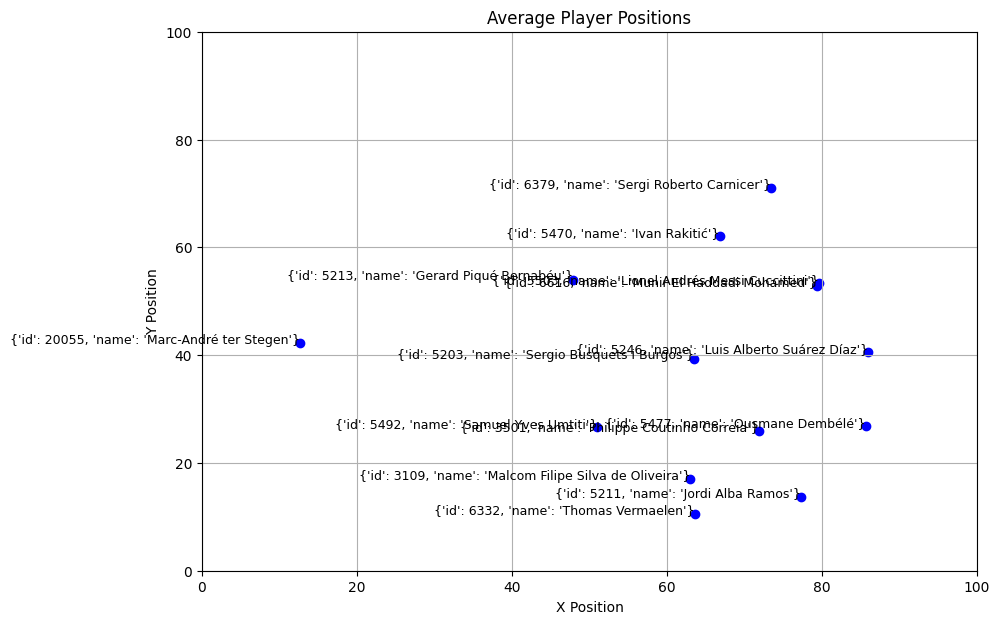

In [27]:
# Plot average player positions
plt.figure(figsize=(10, 7))
plt.scatter(formation['x'], formation['y'], marker='o', color='blue')

# Annotate points with player names only
for i, row in formation.iterrows():
    plt.text(row['x'], row['y'], row['player'], fontsize=9, ha='right')

# Set plot labels
plt.title('Average Player Positions')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.grid(True)
plt.show()


In [28]:
import plotly.express as px

# Plotly scatter plot with player names
fig = px.scatter(formation, x='x', y='y', text='player', color='player',
                 title='Average Player Positions by Team',
                 labels={'x': 'X Position', 'y': 'Y Position'})

# Update the layout
fig.update_traces(textposition='top center')
fig.update_layout(xaxis_title='X Position',
                  yaxis_title='Y Position',
                  xaxis_range=[0, 100],
                  yaxis_range=[0, 100])
fig.show()


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



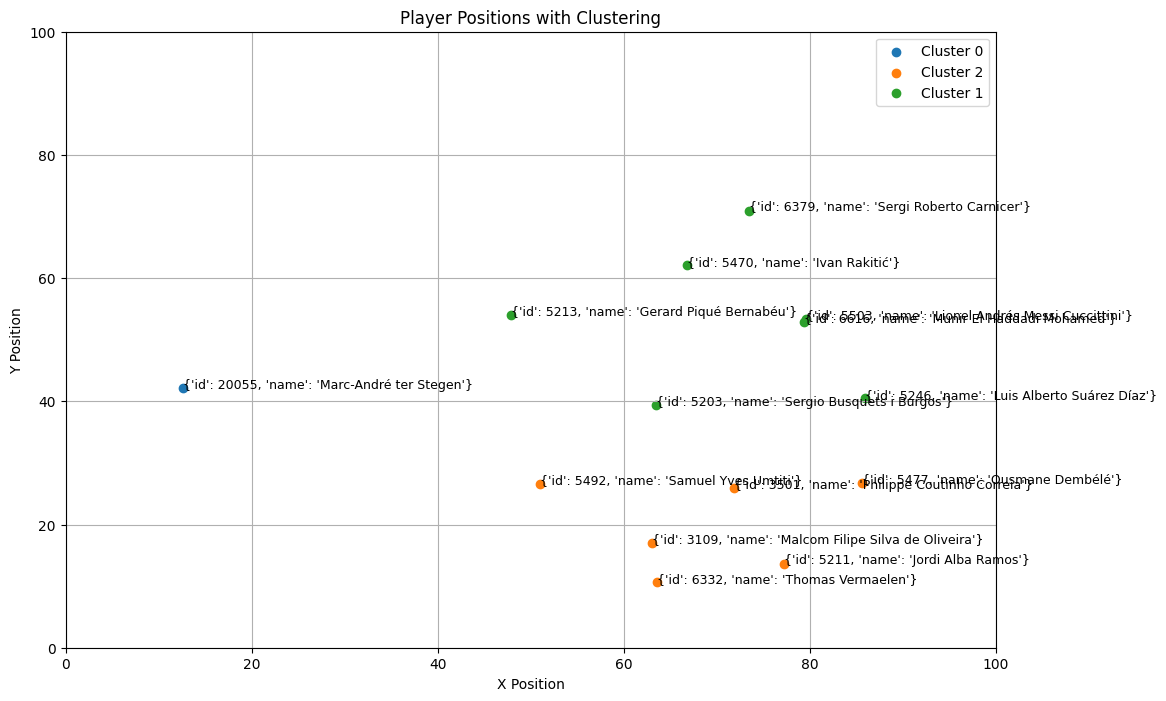

In [29]:
from sklearn.cluster import KMeans

# Assume we want to find 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0).fit(formation[['x', 'y']])
formation['cluster'] = kmeans.labels_

plt.figure(figsize=(12, 8))
for cluster in formation['cluster'].unique():
    cluster_data = formation[formation['cluster'] == cluster]
    plt.scatter(cluster_data['x'], cluster_data['y'], marker='o', label=f'Cluster {cluster}')

    # Annotate points with player names
    for i, row in cluster_data.iterrows():
        plt.text(row['x'], row['y'], row['player'], fontsize=9)

# Set plot labels
plt.title('Player Positions with Clustering')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.grid(True)
plt.legend()
plt.show()


In [30]:
import pandas as pd
import plotly.express as px

# Sample data for demonstration
data = {
    'x': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'y': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
}
barcelona_events = pd.DataFrame(data)

# Print data for inspection
print(barcelona_events.head())
print(barcelona_events.describe())

# Create a heatmap
fig = px.density_heatmap(barcelona_events, x='x', y='y',
                        title='Player Activity Heatmap',
                        labels={'x': 'X Position', 'y': 'Y Position'})

# Update layout
fig.update_layout(xaxis_title='X Position',
                  yaxis_title='Y Position',
                  coloraxis_colorbar_title='Activity Density')

fig.show()


    x   y
0  10  10
1  20  20
2  30  30
3  40  40
4  50  50
                x           y
count   10.000000   10.000000
mean    55.000000   55.000000
std     30.276504   30.276504
min     10.000000   10.000000
25%     32.500000   32.500000
50%     55.000000   55.000000
75%     77.500000   77.500000
max    100.000000  100.000000


In [31]:
import plotly.express as px

# Sample DataFrame with time
df = pd.DataFrame({
    'time': [1, 1, 2, 2],
    'player': ['Player1', 'Player2', 'Player1', 'Player2'],
    'x': [10, 20, 30, 40],
    'y': [30, 20, 10, 20]
})

# Create animated scatter plot
fig = px.scatter(df, x='x', y='y', animation_frame='time', color='player', text='player',
                 title='Player Trajectories Over Time')

fig.update_layout(xaxis_title='X Position', yaxis_title='Y Position')
fig.show()
